<a href="https://colab.research.google.com/github/Braelin2/HW3/blob/main/ECGR5101_HW3_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/ECGR5105/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

In [3]:
convlist =  ['diagnosis']
# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the housing list
dataset[convlist] = dataset[convlist].apply(binary_map)

In [4]:
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [6]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The most accurate K value is:  6
Accuracy:  0.9298245614035088
[0.9210526315789473, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473]

Accuracy: 0.9298245614035088
Precision: 0.9555555555555556
Recall: 0.8775510204081632
F1 Score: 0.9148936170212767


Text(0.5, 427.9555555555555, 'Predicted label')

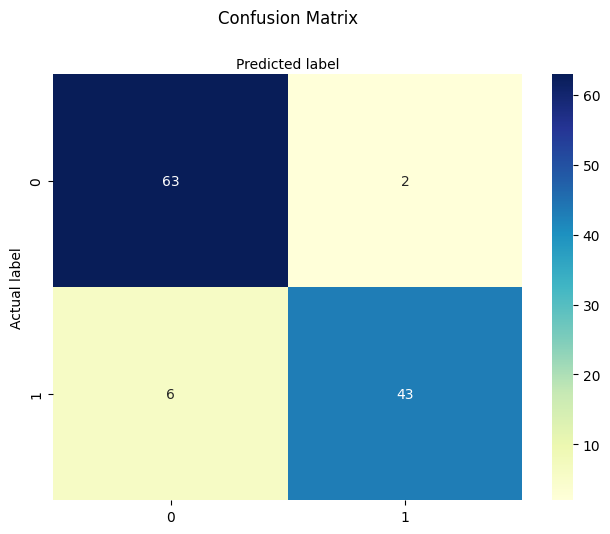

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#setting up a function for PCA reduction
def pcaRedux(x_train,x_test,k):
  pca = PCA(n_components = k)
  x_train1 = pca.fit_transform(x_train)
  x_test1 = pca.fit_transform(x_test)
  return x_train1,x_test1

highest_accuracy = 0
accuracy = []

for k in range(1,31):
  x_train1, x_test1 = pcaRedux(X_train,X_test,k)
  classifier_pca = LogisticRegression(random_state=0)
  classifier_pca.fit(x_train1,Y_train)
  Prediction = classifier_pca.predict(x_test1)

  accuracy.append(metrics.accuracy_score(Y_test, Prediction))

  if(metrics.accuracy_score(Y_test, Prediction) > highest_accuracy):
    highest_accuracy = metrics.accuracy_score(Y_test, Prediction)
    best_k = k

print("The most accurate K value is: ", best_k)
print("Accuracy: ", highest_accuracy)
print(accuracy)

classifier_optimal = LogisticRegression(random_state = 0)
best_train, best_test = pcaRedux(X_train,X_test, best_k)
classifier_optimal.fit(best_train,Y_train)
best_pred = classifier_optimal.predict(best_test)

#Getting the accuracy, precision, recall, and f1 score
print("\nAccuracy:",metrics.accuracy_score(Y_test, best_pred))
print("Precision:",metrics.precision_score(Y_test, best_pred))
print("Recall:",metrics.recall_score(Y_test, best_pred))
print("F1 Score:", metrics.f1_score(Y_test, best_pred))


cnf_matrix = confusion_matrix(Y_test, best_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
